In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [12]:
player_transfers = pd.read_json('players_transfers.json')
player_transfers = player_transfers.loc[:, ['Player_id','Season','Fee','MV']] 
player_transfers = player_transfers.loc[~player_transfers['Fee'].str.contains('Loan')]
player_transfers = player_transfers.loc[player_transfers['Fee'].str.contains('[kmb]')]

def convert_value_to_euros(value):
    value = value.replace('€', '')
    factor = 1 
    if value.endswith('m'):
        factor = 1000000
        value = value.replace('m', '')
    elif value.endswith('k'):
        factor = 1000
        value = value.replace('k', '')
    elif value.endswith('b'):
        factor = 1000000000
        value = value.replace('b', '')  
    elif value == '-':
        return 0
    else:
        factor = 0
    return float(value)*factor
player_transfers['Fee']=player_transfers['Fee'].apply(convert_value_to_euros)
player_transfers['MV']=player_transfers['MV'].apply(convert_value_to_euros)
print(player_transfers)

       Player_id Season         Fee          MV
0         427605  22/23   7000000.0   7000000.0
1         427605  21/22   4250000.0   8500000.0
25         92571  14/15   4750000.0   1500000.0
26         92571  11/12    275000.0     50000.0
38        591949  22/23  16500000.0  18000000.0
...          ...    ...         ...         ...
88248     129386  20/21   4200000.0   4000000.0
88249     129386  17/18   2500000.0   3000000.0
88256     129386  13/14    350000.0    800000.0
88273     199268  18/19    200000.0    675000.0
88280     199268  14/15   1000000.0    800000.0

[10749 rows x 4 columns]


In [13]:
filtered_seasons = player_transfers[player_transfers['Season'].isin(['21/22', '17/18','18/19','19/20','20/21'])]
# grouped_transfers_fee = filtered_seasons.groupby(['Season'])['Fee'].sum().reset_index()
# grouped_transfers_mv = filtered_seasons.groupby(['Season'])['MV'].sum().reset_index()
# grouped_transfers_fee 
# grouped_transfers_mv 

In [14]:
# Group by season and calculate the mean of MV and Fee
mv_mean_per_season = filtered_seasons.groupby('Season')['MV'].mean()
mv_mean_per_season

Season
17/18    4.552279e+06
18/19    5.287152e+06
19/20    7.145929e+06
20/21    6.182315e+06
21/22    7.040906e+06
Name: MV, dtype: float64

In [15]:
fee_mean_per_season = filtered_seasons.groupby('Season')['Fee'].mean()
fee_mean_per_season

Season
17/18    6.334686e+06
18/19    6.359795e+06
19/20    7.556769e+06
20/21    6.694926e+06
21/22    6.575443e+06
Name: Fee, dtype: float64

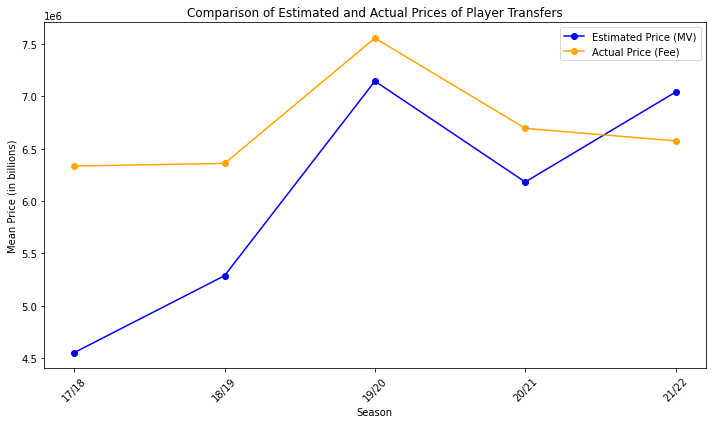

In [16]:


# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(mv_mean_per_season.index, mv_mean_per_season, marker='o', label='Estimated Price (MV)', color='blue')
plt.plot(fee_mean_per_season.index, fee_mean_per_season, marker='o', label='Actual Price (Fee)', color='orange')

# Customize the plot
plt.xlabel('Season')
plt.ylabel('Mean Price (in billions)')
plt.title('Comparison of Estimated and Actual Prices of Player Transfers')
plt.xticks(rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


<AxesSubplot: xlabel='Season', ylabel='Price'>

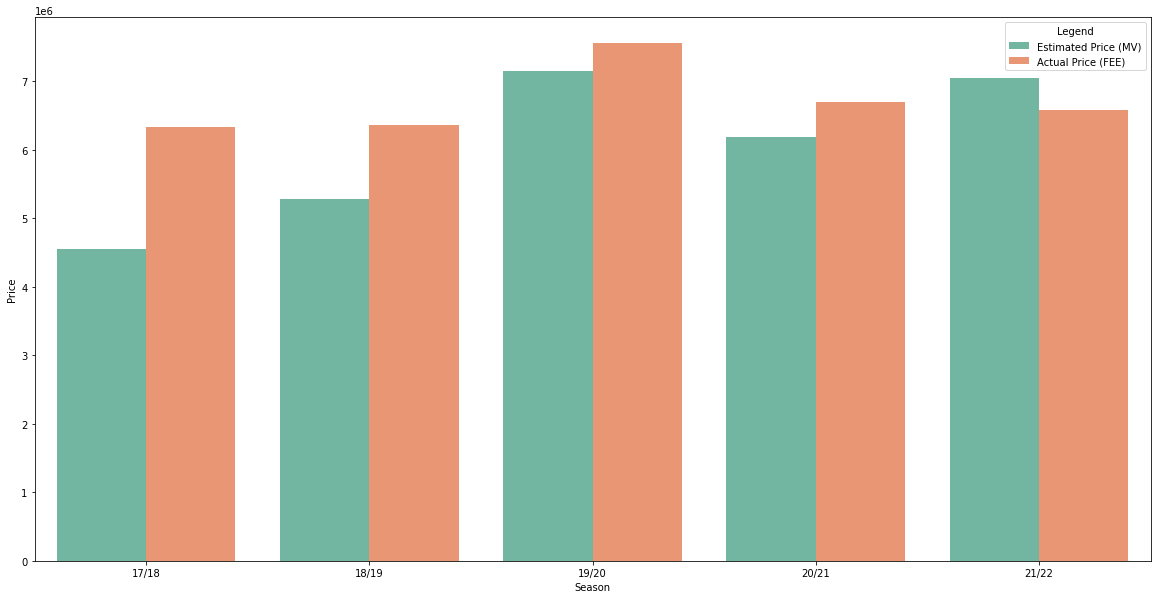

In [20]:
import seaborn as sns
plt.figure(figsize=(20, 10))
# create a dataframe with the position counts for each dataset
df = pd.DataFrame({
    'Price': list(mv_mean_per_season.values) + list(fee_mean_per_season.values),
    'Season': list(mv_mean_per_season.index) + list(fee_mean_per_season.index),
    'Legend': ['Estimated Price (MV)'] * len(fee_mean_per_season) + ['Actual Price (FEE)'] * len(fee_mean_per_season)
})

# create the bar plot using Seaborn's barplot function
sns.barplot(data=df, x='Season', y='Price', hue='Legend', palette='Set2')